## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [ ]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание.
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

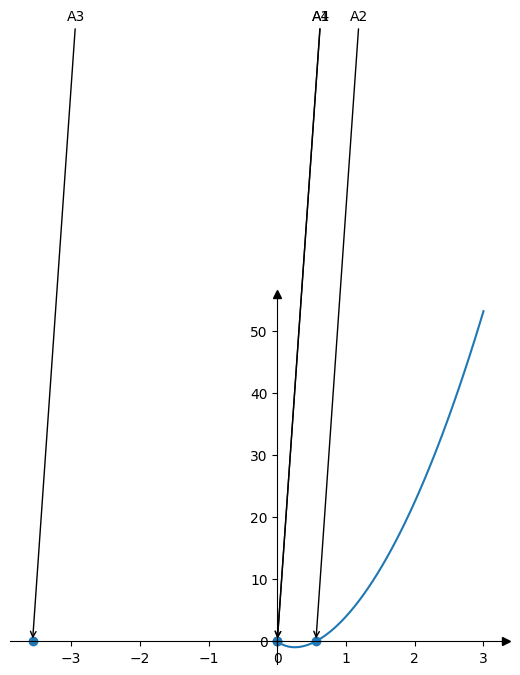

In [ ]:
x = Symbol('x')
def f(x):
  return (x**2 + 3*x - 2) * sympy.log(3*x + 1, 2)


roots = solve(f(x))
roots
point_OY = f(0)
point_OY
y_coord = [0]*len(roots)
roots.append(0)
y_coord.append(point_OY)
X = np.linspace(0, 3, 100)
ax = plt.gca()
for i, x_coord in enumerate(roots):
  ax.annotate('A' + str(i + 1),
  xy=(x_coord, y_coord[i]), xycoords='data',
  xytext=(x_coord + 0.5, y_coord[i] + 100), textcoords='data',
  arrowprops=dict(arrowstyle="->",
  connectionstyle="arc3"))
ax.spines['right'].set_color('none') # Правая сторона рамки стала бесцветной, но не исчезла!
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0)) # Нижняя сторона рамки переместилась в начало координат
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(X, [f(i) for i in X])
ax.scatter(roots, y_coord)

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

In [ ]:
def f(x):
    return (35*x**2 + 4*x - 15)/(3*x - 2)
fnum, fdenom = sympy.fraction(f(x))
v_as = sympy.solve(fdenom, x)
v_as

[2/3]

In [ ]:
y0pos = sympy.limit(f(x), x, +sympy.oo)
y0neg = sympy.limit(f(x), x, -sympy.oo)
y0pos, y0neg

(oo, -oo)

In [ ]:
kpos = sympy.limit(f(x)/x, x, +sympy.oo)
kneg = sympy.limit(f(x)/x, x, -sympy.oo)
if kpos == kneg:
    k = kpos
else:
    k = (kneg, kpos)
k

35/3

In [ ]:
b = sympy.limit(f(x) - k*x, x, sympy.oo)
b

82/9

In [ ]:
y_as = k*x + b
display(y_as)

35*x/3 + 82/9

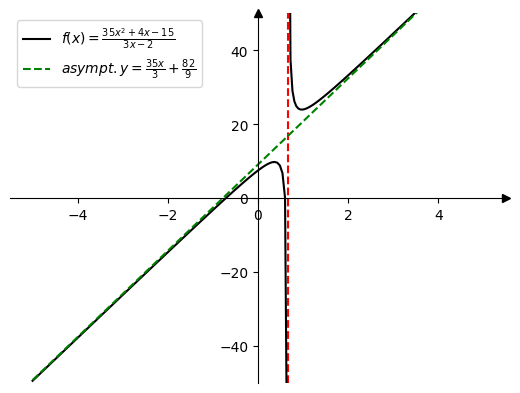

In [ ]:
minY = -50
maxY = 50
ax = plt.gca()
ax.set(ylim=(minY, maxY))
for item in v_as:
    ax.axvline(x=item, color='red', linestyle='--')
X1 = np.linspace(-5, float(item - 0.01), 100)
X2 = np.linspace(float(item + 0.01), 5, 100)
Y1 = f(X1)
Y2 = f(X2)
ax.plot(X1, Y1, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$') # График левой ветви функции
ax.plot(X2, Y2, 'k-') # График правой ветви функции
ax.plot([X1[0], X2[-1]], [y_as.subs(x, X1[0]), y_as.subs(x, X2[-1])], 'g--',
         label=r'$asympt. y=' + sympy.latex(y_as) + r'$')# График наклонной асимптоты
ax.legend(loc='best')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю.

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета.

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

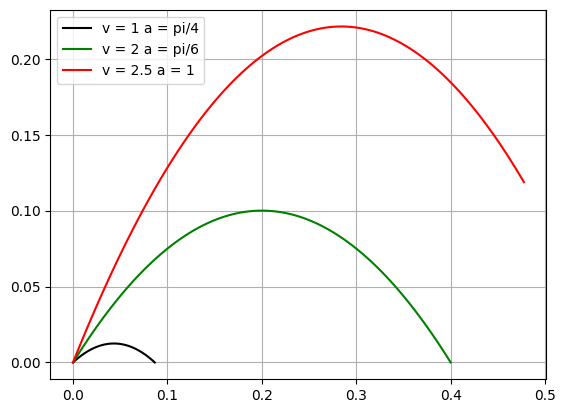

In [ ]:
def f(v, a, t):
  x = v*t*np.cos(a)
  y = v*t*np.sin(a)- 5 * t ** 2
  return (x, y)
t = Symbol("t")

v1, a1 = (1, np.pi/6)
t_interval1 = solve(v1*t*np.sin(a1)- 5 * t **2)
prep1 = np.linspace(float(t_interval1[0]),float(t_interval1[1]),100)
X1,Y1 = f(v1,a1,prep1)

v2, a2 = (2, np.pi/4)
t_interval2 = solve(v2*t*np.sin(a2)- 5 * t **2)
prep2 = np.linspace(float(t_interval2[0]),float(t_interval2[1]),100)
X2,Y2 = f(v2,a2,prep2)

v3, a3 = (2.5, 1)
t_interval3 = solve(v3*t*np.sin(a2)- 5 * t **2)
prep3 = np.linspace(float(t_interval3[0]),float(t_interval3[1]),100)
X3, Y3 = f(v3,a3,prep3)

plt.plot(X1, Y1,color="black", label  = f"v = {v1} a = pi/4")
plt.plot(X2, Y2,color="green", label  = f"v = {v2} a = pi/6")
plt.plot(X3, Y3,color="red", label  = f"v = {v3} a = 1")
plt.legend(loc='best')
plt.grid()
plt.show()

Вариант $31$


Построить в одной координатной плоскости графики функций $$f(x) = 5^{\cos{\left(x \right)}}$$ $$g(x) = x^{3} - \frac{2 x}{3} + \sin{\left(\frac{3 x}{2} \right)} - \frac{1}{2}$$ на отрезке $\left[- \frac{1}{2}, \  \frac{3}{2}\right]$, $f(x)$ желтая сплошная линия, $g(x)$ черная сплошная линия. Отметки на горизонтальной оси от $- \frac{1}{2}$ до $\frac{3}{2}$ с шагом $1$, отметки подписать формулами как в Примере 3. По вертикальной оси отметки $1$, $2$, $3$.

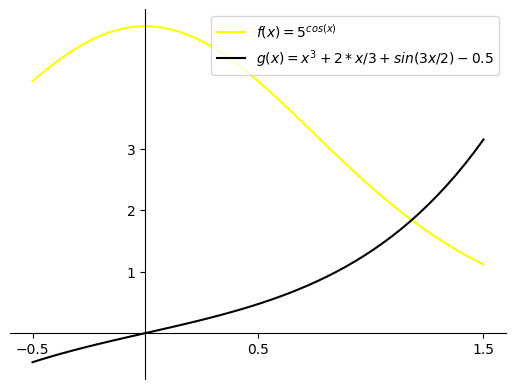

In [ ]:
def f(x):
  return 5**np.cos(x)
def g(x):
  return x**3 - 2*x/3 + np.sin(3*x/2) - 0
X = np.linspace(-0.5, 1.5, 50)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(X, f(X),color="yellow", label = "$f(x) = 5^{cos(x)}$")
ax.plot(X, g(X), color="black", label = "$g(x) = x^3 + {2*x/3} + {sin(3x/2)} - 0.5$")
ax.set_yticks([1,2,3])
ax.set_xticks([-0.5, 0.5, 1.5])
ax.legend(loc='upper right')
plt.show()